GPU support =  False
RMSE after 100 training steps is [0.76888507]
RMSE after 200 training steps is [0.94304061]
RMSE after 300 training steps is [0.25220881]
RMSE after 400 training steps is [0.50984632]


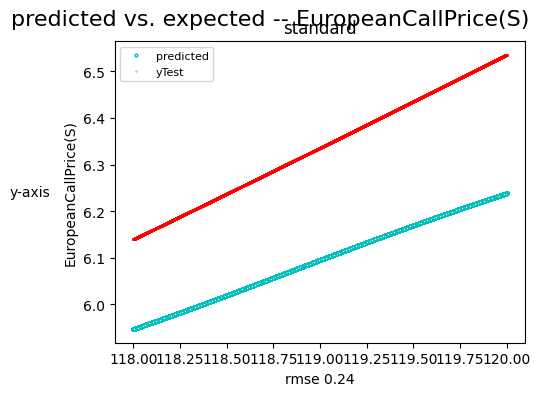

In [2]:
### Copy of Main.py as a juypter notebook to visualize results

###
### 0. Import packages and references
###
### Import framework
import os
mainDirectory = os.path.abspath(os.path.join(os.getcwd(), '..','..', '..','..'))
packageFile = os.path.abspath(os.path.join(mainDirectory, 'montecarlolearning', 'packages.py'))
exec(open(packageFile).read())

###
### 1. Training data
###
#from CDF import *
Generator = Multilevel_GBM(Multilevel_Train_Case.Euler, 5 ,Multilevel_Train_Dimension.one)
Generator.set_inputName('S')
Generator.set_outputName('EuropeanCallPrice(S)')

###
### 2. Set Nueral network structure / Hyperparameters
### 

Regressor = Neural_Approximator()
Regressor.set_Generator(Generator)
Regressor.set_hiddenNeurons(20)
Regressor.set_hiddenLayers(2)
Regressor.set_activationFunctionsHidden(tf.nn.sigmoid)
Regressor.set_activationFunctionOutput(tf.nn.sigmoid)
Regressor.set_weight_seed(1)

TrainSettings = TrainingSettings()
TrainSettings.set_learning_rate_schedule=([(0.0, 0.0001),  (0.2, 0.0001),  (0.4, 0.0001), (0.6, 0.0001),  (0.8, 0.0001)] )
TrainSettings.set_min_batch_size(1)
TrainSettings.set_test_frequency(100)
TrainSettings.set_nTest(100000)
TrainSettings.set_samplesPerStep(100000)
TrainSettings.set_trainingSteps(500)

###
### 3. Train network and Study results
### Comment: For different trainingSetSizes the neural network reset and not saved, hence train and evaluation of yPredicted are done together currently
###

xTest, yTest, yPredicted = train_and_test(Generator, Regressor, TrainSettings)
plot_results("predicted vs. expected", yPredicted, xTest, yTest, Generator)

RMSE after 100 training steps is [5.21712202]
RMSE after 200 training steps is [5.53181372]
RMSE after 300 training steps is [5.61129886]
RMSE after 400 training steps is [5.50349233]
RMSE after 100 training steps is [4.69419371]
RMSE after 200 training steps is [4.72275573]
RMSE after 300 training steps is [4.67017828]
RMSE after 400 training steps is [4.89813584]
RMSE after 100 training steps is [4.85965221]
RMSE after 200 training steps is [4.85878828]
RMSE after 300 training steps is [4.8229563]
RMSE after 400 training steps is [4.80511353]
RMSE after 100 training steps is [5.07662948]
RMSE after 200 training steps is [5.22603591]
RMSE after 300 training steps is [5.34062258]
RMSE after 400 training steps is [5.22032032]
RMSE after 100 training steps is [5.76063545]
RMSE after 200 training steps is [5.68716683]
RMSE after 300 training steps is [5.68293231]
RMSE after 400 training steps is [5.63197868]


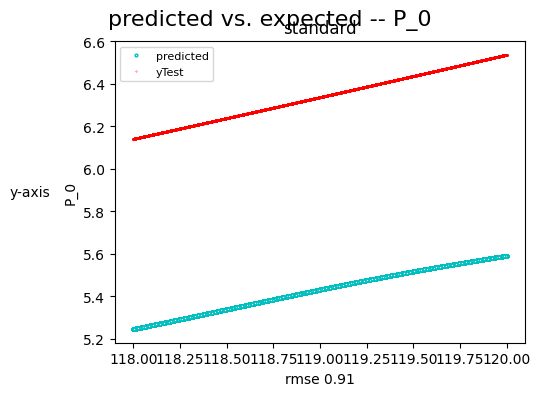

In [8]:
###
### 1. Training data
###
#from CDF import *
Generator = Multilevel_GBM(Multilevel_Train_Case.Milstein, 0, Multilevel_Train_Dimension.one)
Generator.set_inputName('S')
Generator.set_outputName('P_0')

GeneratorLevel1 = Multilevel_GBM(Multilevel_Train_Case.LevelEstimator, 0, Multilevel_Train_Dimension.one)
GeneratorLevel1 .set_inputName('x')
GeneratorLevel1 .set_outputName('P_1-P_0')

GeneratorLevel2 = Multilevel_GBM(Multilevel_Train_Case.LevelEstimator, 1, Multilevel_Train_Dimension.one)
GeneratorLevel2 .set_inputName('x')
GeneratorLevel2 .set_outputName('P_2-P_1')

GeneratorLevel3 = Multilevel_GBM(Multilevel_Train_Case.LevelEstimator, 2, Multilevel_Train_Dimension.one)
GeneratorLevel3 .set_inputName('x')
GeneratorLevel3 .set_outputName('P_3-P_2')

GeneratorLevel4 = Multilevel_GBM(Multilevel_Train_Case.LevelEstimator, 3, Multilevel_Train_Dimension.one)
GeneratorLevel4 .set_inputName('x')
GeneratorLevel4 .set_outputName('P_4-P_3')


###
### 2. Set Nueral network structure / Hyperparameters
### 

Regressor = Neural_Approximator()
Regressor.set_Generator(Generator)
Regressor.set_hiddenNeurons(20)
Regressor.set_hiddenLayers(2)
Regressor.set_activationFunctionsHidden(tf.nn.sigmoid)
Regressor.set_activationFunctionOutput(tf.nn.sigmoid)
Regressor.set_weight_seed(1)

TrainSettings = TrainingSettings()
TrainSettings.set_learning_rate_schedule=([(0.0, 0.0001),  (0.2, 0.0001),  (0.4, 0.0001), (0.6, 0.0001),  (0.8, 0.0001)] )
TrainSettings.set_min_batch_size(1)
TrainSettings.set_test_frequency(100)
TrainSettings.set_nTest(100000)
TrainSettings.set_samplesPerStep(400000)
TrainSettings.set_trainingSteps(500)

###
### 3. Train network and Study results
### Comment: For different trainingSetSizes the neural network reset and not saved, hence train and evaluation of yPredicted are done together currently
###

xTest, yTest, yPredicted = train_and_test(Generator, Regressor, TrainSettings)
TrainSettings.set_samplesPerStep(100000)
xTest2, yTest2, yPredictedLevel1 = train_and_test(GeneratorLevel1, Regressor, TrainSettings)
TrainSettings.set_samplesPerStep(25000)
xTest, yTest, yPredictedLevel2 = train_and_test(GeneratorLevel2, Regressor, TrainSettings)
TrainSettings.set_samplesPerStep(10000)
xTest, yTest, yPredictedLevel3 = train_and_test(GeneratorLevel3, Regressor, TrainSettings)
xTest, yTest, yPredictedLevel4 = train_and_test(GeneratorLevel4, Regressor, TrainSettings)
multilevel_predicted = {('standard', 100000): np.add(yPredicted[('standard', 100000)], yPredictedLevel1[('standard', 100000)])}
multilevel_predicted = {('standard', 100000): np.add(multilevel_predicted[('standard', 100000)], yPredictedLevel2[('standard', 100000)])}
multilevel_predicted = {('standard', 100000): np.add(multilevel_predicted[('standard', 100000)], yPredictedLevel3[('standard', 100000)])}
multilevel_predicted = {('standard', 100000): np.add(multilevel_predicted[('standard', 100000)], yPredictedLevel4[('standard', 100000)])}
plot_results("predicted vs. expected", multilevel_predicted, xTest, yTest, Generator)